#**Regresión Lineal**

**l. Introducción**

La regresión lineal tiene como objetivo analizar la relación o dependencia que hay entre dos o mas variables estudiadas. La idea es cuantificar la intensidad de dicha relación lineal entre las variables a través de un coeficiente de correlación lineal que se conoce por la letra “r” también conocido como coeficiente de Pearson. Gráficamente todo esto se puede plasmar mediante un diagrama de dispersión o nube de puntos con su correspondiente recta ajustada.





**ll. Breve historia**

El término regresión fue introducido por Galton en su libro “Natural inheritance” (1889) refiriéndose a la “ley de la regresión universal”:
“Cada peculiaridad en un hombre es compartida por sus descendientes, pero en media, en un grado menor.” (Regresión a la media)

–Su trabajo se centraba en la descripción de los rasgos físicos de los descendientes (una variable) a partir de los de sus padres (otra variable).

– Pearson (un amigo suyo) realizó un estudio con más de 1000 registros de grupos familiares observando una relación del tipo:

• Altura del hijo = 85cm + 0,5 • altura del padre (aprox.)
• Conclusión: los padres muy altos tienen tendencia a tener hijos que heredan parte de esta altura, aunque tienen tendencia a acercarse (regresar) a la media. Lo mismo puede decirse de los padres muy bajos.

Hoy en día el sentido de regresión es el de predicción de una medida basándonos en el conocimiento de otra. 

Para ampliar mas en la historia de la regresión podemos irnos al siguiente articulo:
[Algunas notas históricas sobre la correlación y regresión y su uso en el aula ](https://core.ac.uk/download/pdf/20343739.pdf)

**lll. Planteamiento del algoritmo**

La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza en Machine Learning y en estadística. En su versión más sencilla, lo que haremos es “dibujar una recta” que nos indicará la tendencia de un conjunto de datos continuos (si fueran discretos, utilizaríamos Regresión Logística).

Para iniciar hay que recordar la formula de una recta:

$
y = mx + b
$

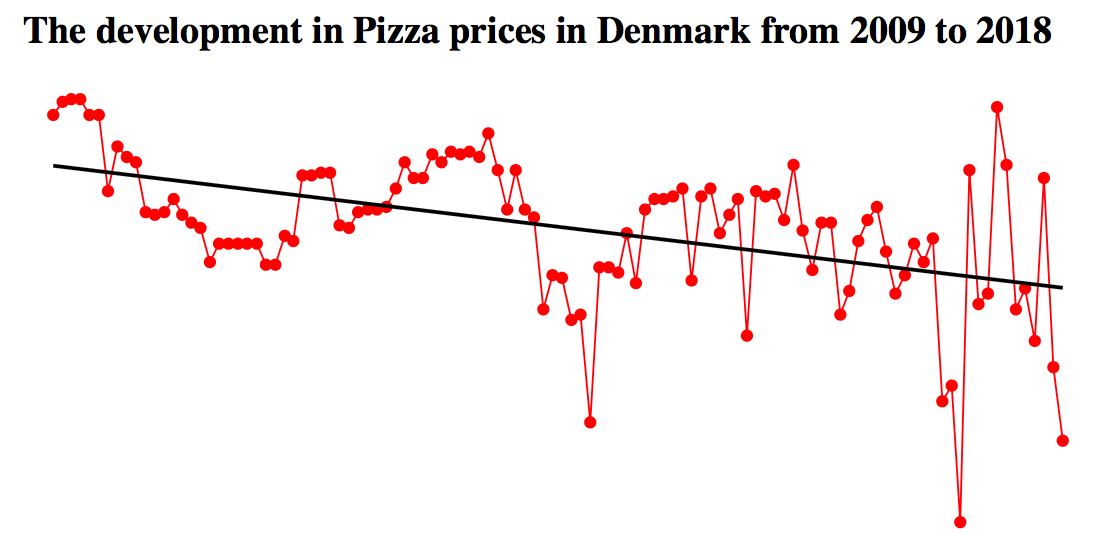

En la imagen se muestra un ejemplo de regresión lineal. 

Recordemos que los algoritmos de Machine Learning Supervisados, aprenden por sí mismos y -en este caso- a obtener automáticamente esa “recta” que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor “Y” de salida real. El algoritmo deberá minimizar el coste de una función de error cuadrático y esos coeficientes corresponderán con la recta óptima. Hay diversos métodos para conseguir minimizar el coste. Lo más común es utilizar una versión vectorial y la llamada Ecuación Normal que nos dará un resultado directo.

**lV. Ejemplo**

In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving articulos_ml.csv to articulos_ml.csv


In [ ]:
import pandas as pd 
import io 

data = pd.read_csv(io.BytesIO(uploaded['articulos_ml.csv'])) 
print(data)


                                                 Title  ... # Shares
0    What is Machine Learning and how do we use it ...  ...   200000
1     10 Companies Using Machine Learning in Cool Ways  ...    25000
2    How Artificial Intelligence Is Revolutionizing...  ...    42000
3    Dbrain and the Blockchain of Artificial Intell...  ...   200000
4    Nasa finds entire solar system filled with eig...  ...   200000
..                                                 ...  ...      ...
156  [Log] 83: How Google Uses Machine Learning And...  ...     3239
157  [Log] 84: Zuck Knows If You've Been Bad Or Goo...  ...    25019
158  [Log] 85: Microsoft Improves Windows Phone Voi...  ...    49614
159  [Log] 86: How Google's Acquisition Of DNNresea...  ...    33660
160   [Log] 87: Google's Cloud Is Eating Apple's Lunch  ...     5956

[161 rows x 8 columns]


In [ ]:
#veamos cuantas dimensiones y registros contiene
data.shape

(161, 8)

In [ ]:
#son 161 registros con 8 columnas. Veamos los primeros registros
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [ ]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


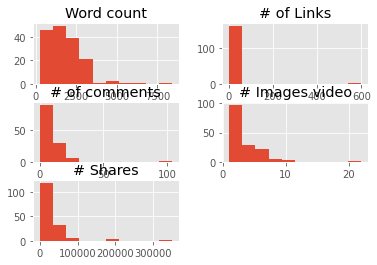

In [ ]:
	
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()

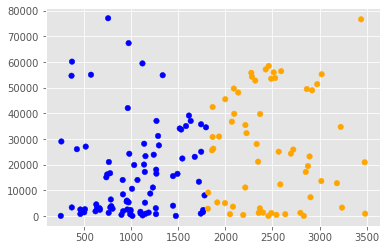

In [ ]:
	
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

Regresion Lineal: 

In [ ]:
	
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


Predicción:

In [ ]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


Regresión lineal multiple

In [ ]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


**lV. Conclusion**

Vemos la importancia de implementar este algoritmo; ya que puede ser usado para establacer la relación lineal entre dos o mas variables y de esta forma poder realizar predicciones que pueden ser de mucha utilidad. 

El ejemplo desarrolado se encuentra en: [Regresión Lineal](https://www.aprendemachinelearning.com/ejemplo-web-scraping-python-ibex35-bolsa-valores/)